In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import torch.nn as nn
import torch
import torch.optim as optim
from prophet import Prophet

<ipython-input-11-c525b1cb76b7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [12]:
df = pd.read_csv('AAPL.csv')

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp8ltid2q/1vcd1358.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp8ltid2q/mprknp66.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44316', 'data', 'file=/tmp/tmpp8ltid2q/1vcd1358.json', 'init=/tmp/tmpp8ltid2q/mprknp66.json', 'output', 'file=/tmp/tmpp8ltid2q/prophet_model2hmpa9zu/prophet_model-20230507141619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:16:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
5896 2022-12-27  168.082419  158.857657  179.048026   166.163124   170.060006   
5897 2022-12-28  168.156838  159.232624  179.192074   166.216886   170.148353   
5898 2022-12-29  168.231256  160.288272  179.142811   166.270647   170.233572   
5899 2022-12-30  168.305675  159.359217  179.634565   166.324409   170.318194   
5900 2022-12-31  168.380094  159.385353  179.413923   166.380601   170.400468   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
5896        1.165803              1.165803              1.165803 -0.000838   
5897        1.118644              1.118644              1.118644  0.039452   
5898        0.995093              0.995093              0.995093  0.009772   
5899        0.784065              0.784065              0.784065 -0.102039   
5900        0.854837              0.854837              0.854837  0.072122   

      weekly_lower  weekly_upper    yearly  

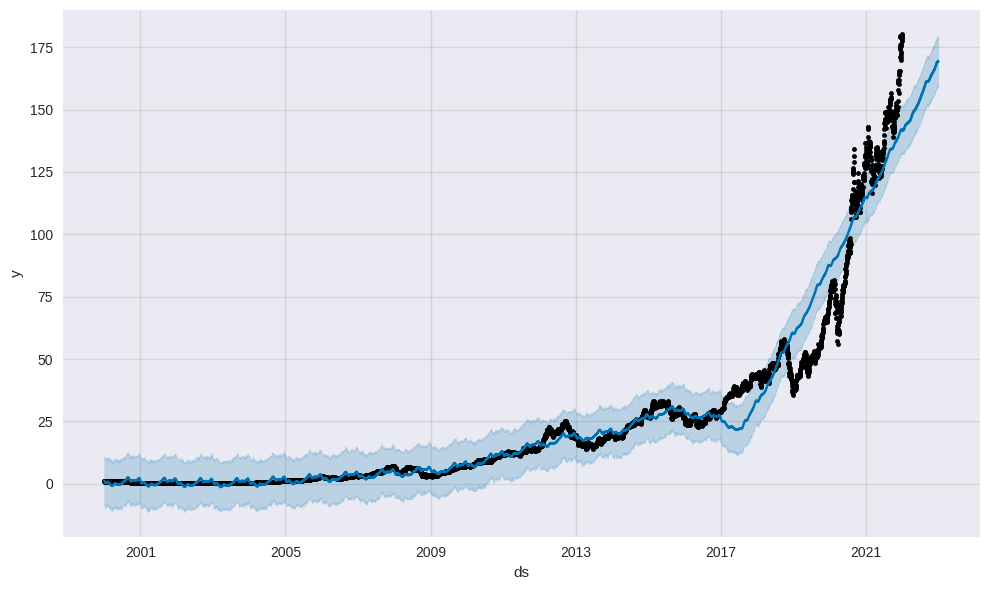

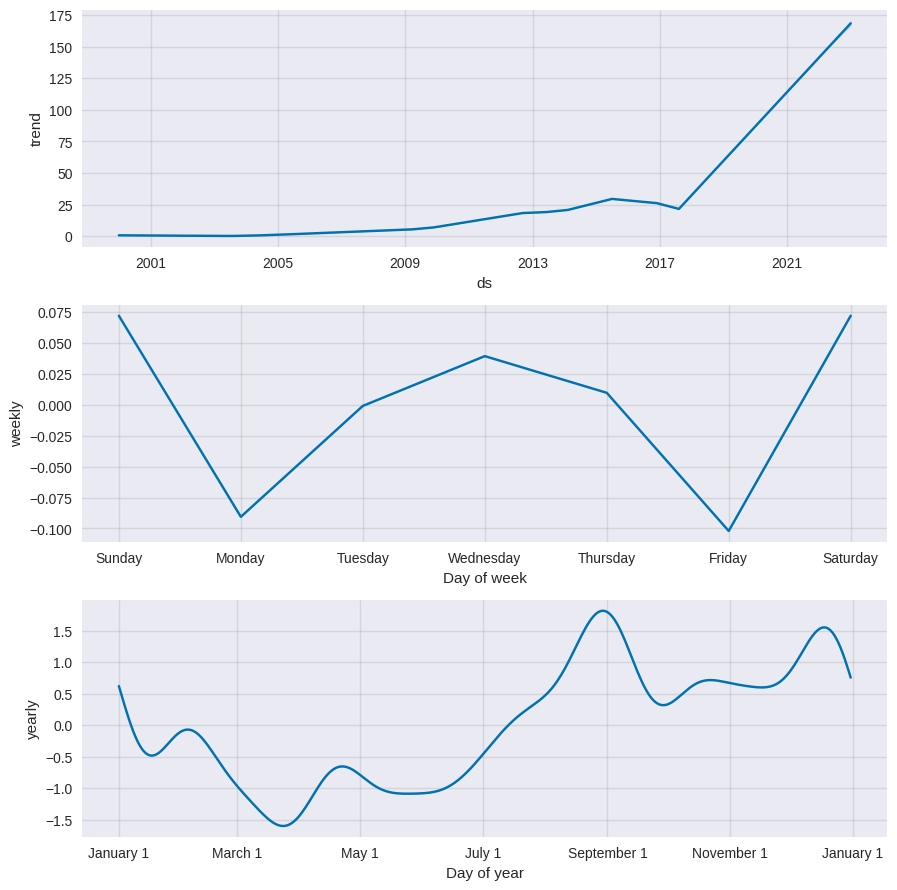

In [13]:
df.rename(columns={'Date':'ds', 'Close':'y'}, inplace=True)


# Prophet 모델을 초기화합니다.
model = Prophet()

# Prophet 모델에 데이터를 학습시킵니다.
model.fit(df)

# 1년치 예측 결과를 출력합니다.
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
print(forecast.tail())

# 예측 결과를 그래프로 시각화합니다.
fig1 = model.plot(forecast)

# 추세 변화를 그래프로 시각화합니다.
fig2 = model.plot_components(forecast)

Baseline을 prophet으로 잡아도 괜찮지 않을까?

In [31]:
len(df)

5536

In [29]:
len(model.params['trend'][0])

5536

In [38]:
future_dates = model.make_future_dataframe(periods=30)

# Make predictions
forecast = model.predict(future_dates)

# Extract prediction intervals
lower_bounds = forecast['yhat_lower']
upper_bounds = forecast['yhat_upper']

# Compute uncertainty interval size
interval_size = (upper_bounds - lower_bounds).mean()

print(f'Average size of prediction intervals: {interval_size:.2f}')

Average size of prediction intervals: 19.09


In [48]:
(upper_bounds.tail(1) - lower_bounds.tail(1))/interval_size

5565    0.981768
dtype: float64

In [62]:
lower_bounds.tail(1)

5565    133.702756
Name: yhat_lower, dtype: float64

In [59]:
df['y'].tail(1)

5535    177.570007
Name: y, dtype: float64

In [61]:
lower_bounds.tail(1) - df['y'].tail(1)

5535   NaN
5565   NaN
dtype: float64

In [63]:
# Define future dates to predict
future_dates = model.make_future_dataframe(periods=30)

# Make predictions
forecast = model.predict(future_dates)

# Extract predicted prices and uncertainty intervals
predicted_prices = forecast['yhat']
lower_bound = forecast['yhat_lower']
upper_bound = forecast['yhat_upper']

# Compute the proportion to invest based on uncertainty intervals
budget = 10000 # Set your budget here
risk_tolerance = 0.05 # Set your risk tolerance here
expected_return = 0.1 # Set your expected return here

# Compute the range of possible returns based on the uncertainty intervals
possible_returns = (upper_bound - predicted_prices) / predicted_prices
expected_return_pctile = possible_returns.quantile(expected_return)

# Choose the proportion to invest based on risk tolerance and expected return
proportion_to_invest = min(risk_tolerance / expected_return_pctile, 1)

# Compute the amount to invest based on the predicted price and proportion to invest
predicted_price = predicted_prices.iloc[-1] # Use the last predicted price as the buy signal
amount_to_invest = budget * proportion_to_invest
shares_to_buy = amount_to_invest / predicted_price

print(f'Buy {shares_to_buy:.2f} shares at {predicted_price:.2f} per share')
print(f'Invest {proportion_to_invest*100:.2f}% of your budget')

Buy 49.34 shares at 143.37 per share
Invest 70.74% of your budget


In [67]:
data = df
data

,ds,y
0,2000-01-03,0.999442
1,2000-01-04,0.915179
2,2000-01-05,0.928571
3,2000-01-06,0.848214
4,2000-01-07,0.888393
...,...,...
5531,2021-12-27,180.330002
5532,2021-12-28,179.289993
5533,2021-12-29,179.380005
5534,2021-12-30,178.199997


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp8ltid2q/2tpo1r63.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp8ltid2q/224y073c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55148', 'data', 'file=/tmp/tmpp8ltid2q/2tpo1r63.json', 'init=/tmp/tmpp8ltid2q/224y073c.json', 'output', 'file=/tmp/tmpp8ltid2q/prophet_modelh28xrotj/prophet_model-20230507165129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:51:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:51:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp8

            date        budget     shares       price   returns
5531  2021-12-27  1.500362e-15  74.080213  180.330002  1.335888
5532  2021-12-28  3.703873e-16  74.080213  179.289993  1.328184
5533  2021-12-29  8.511373e-17  74.080213  179.380005  1.328851
5534  2021-12-30  2.104590e-17  74.080213  178.199997  1.320109
5535  2021-12-31  5.687861e-18  74.080213  177.570007  1.315442


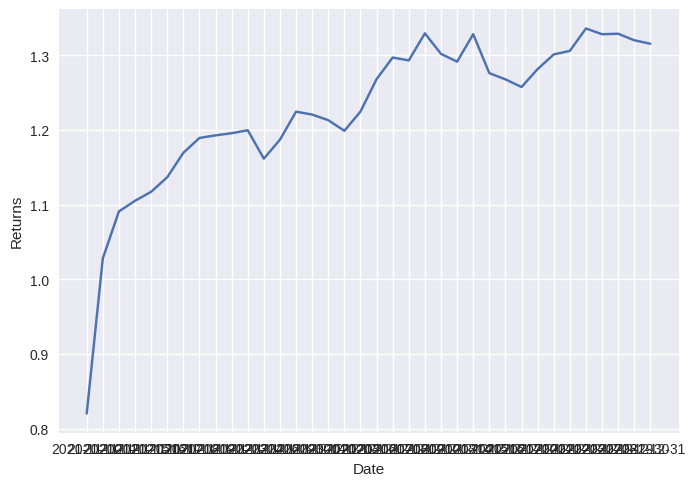

In [71]:
# Define parameters for the investing strategy
initial_budget = 10000 # Set your initial budget here
investment_horizon = 30 # Set your investment horizon in days here
risk_tolerance = 0.05 # Set your risk tolerance here
expected_return = 0.1 # Set your expected return here

# Create a dataframe to track the performance of the strategy
performance = pd.DataFrame(columns=['date', 'budget', 'shares', 'price', 'returns'])

# Initialize the budget and shares owned
budget = initial_budget
shares_owned = 0

# Loop over the historical prices and make investment decisions using Prophet
for i in range(5500, len(data)):

    # Train the Prophet model on historical data up to the current date
    model = Prophet()
    model.fit(data[:i+1])
    
    # Make a prediction for the investment horizon
    future_dates = model.make_future_dataframe(periods=investment_horizon)
    forecast = model.predict(future_dates)
    predicted_price = forecast['yhat'].iloc[-1]
    lower_bound = forecast['yhat_lower'].iloc[-1]
    upper_bound = forecast['yhat_upper'].iloc[-1]
    
    # Compute the range of possible returns based on the uncertainty intervals
    possible_returns = (upper_bound - predicted_price) / predicted_price
    expected_return_pctile = np.percentile([possible_returns],expected_return)
    
    # Compute the proportion to invest based on risk tolerance and expected return
    proportion_to_invest = min(risk_tolerance / expected_return_pctile, 1)
    
    # Compute the amount to invest based on the predicted price and proportion to invest
    amount_to_invest = budget * proportion_to_invest
    shares_to_buy = amount_to_invest / predicted_price
    
    # Update the budget and shares owned based on the investment decision
    budget -= amount_to_invest
    shares_owned += shares_to_buy
    
    # Compute the returns from the investment
    current_price = data['y'].iloc[i]
    investment_returns = (current_price - predicted_price) / predicted_price
    total_returns = shares_owned * current_price / initial_budget
    
    # Record the performance of the strategy
    performance.loc[i] = [data['ds'].iloc[i], budget, shares_owned, current_price, total_returns]

# Print the final performance of the strategy
print(performance.tail())

# Plot the performance of the strategy
import matplotlib.pyplot as plt
plt.plot(performance['date'], performance['returns'])
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()